In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
sns.set()

In [2]:
data = pd.read_csv("spotify.csv")

In [3]:
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [4]:
data.shape

(174389, 19)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [6]:
data.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [7]:
df = data.drop(columns=['id', 'name', 'artists', 'release_date', 'year'])
df.corr()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
acousticness,1.000000,-0.263217,-0.089169,-0.750852,-0.208176,0.221956,-0.028028,-0.029654,-0.546639,0.064633,-0.396744,-0.022437,-0.223840,-0.166968
danceability,-0.263217,1.000000,-0.100757,0.204838,0.200842,-0.215589,0.026266,-0.110033,0.249541,-0.048358,0.123746,0.239962,0.005479,0.536713
duration_ms,-0.089169,-0.100757,1.000000,0.060516,-0.033808,0.103621,0.002020,0.028942,0.019791,-0.046849,0.024717,-0.097838,-0.008182,-0.183199
energy,-0.750852,0.204838,0.060516,1.000000,0.102561,-0.177750,0.035780,0.134815,0.779267,-0.056160,0.328939,-0.112616,0.266448,0.326418
explicit,-0.208176,0.200842,-0.033808,0.102561,1.000000,-0.130609,0.005282,0.037288,0.106249,-0.062503,0.152545,0.353872,0.008075,-0.009275
instrumentalness,0.221956,-0.215589,0.103621,-0.177750,-0.130609,1.000000,-0.004619,-0.047941,-0.317562,-0.056731,-0.300625,-0.133966,-0.068656,-0.219188
key,-0.028028,0.026266,0.002020,0.035780,0.005282,-0.004619,1.000000,-0.003368,0.025227,-0.127397,0.001951,0.009648,0.005009,0.025592
liveness,-0.029654,-0.110033,0.028942,0.134815,0.037288,-0.047941,-0.003368,1.000000,0.062695,0.001677,-0.078959,0.122034,0.008586,-0.005781
loudness,-0.546639,0.249541,0.019791,0.779267,0.106249,-0.317562,0.025227,0.062695,1.000000,-0.019250,0.337194,-0.213504,0.217914,0.302520
mode,0.064633,-0.048358,-0.046849,-0.056160,-0.062503,-0.056731,-0.127397,0.001677,-0.019250,1.000000,0.007652,-0.040711,0.002438,0.021592


<AxesSubplot:>

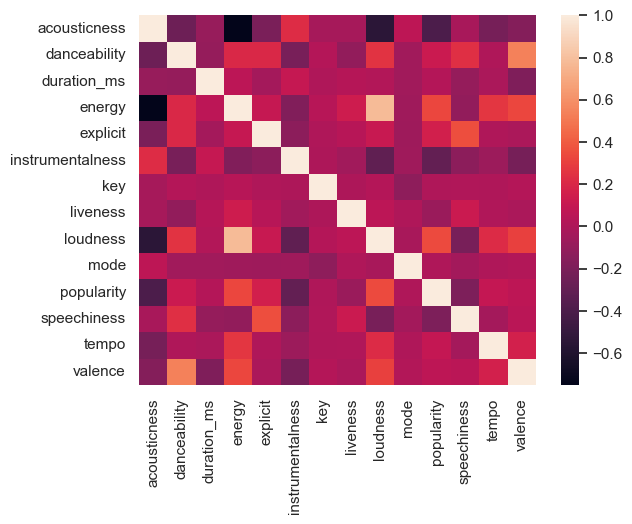

In [8]:
sns.heatmap(df.corr())

In [9]:
from sklearn.preprocessing import MinMaxScaler
datatypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
normarization = data.select_dtypes(include=datatypes)
for col in normarization.columns:
    MinMaxScaler(col)

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
features = kmeans.fit_predict(normarization)
data['features'] = features
MinMaxScaler(data['features'])

MinMaxScaler(feature_range=0         2
1         2
2         2
3         3
4         2
         ..
174384    2
174385    2
174386    6
174387    6
174388    6
Name: features, Length: 174389, dtype: int32)

In [12]:
class Spotify_Recommendation():
    def __init__(self, dataset):
        self.dataset = dataset
    def recommend(self, songs, amount=1):
        distance = []
        song = self.dataset[(self.dataset.name.str.lower() == songs.lower())].head(1).values[0]
        rec = self.dataset[self.dataset.name.str.lower() != songs.lower()]
        for songs in tqdm(rec.values):
            d = 0
            for col in np.arange(len(rec.columns)):
                if not col in [1, 6, 12, 14, 18]:
                    d = d + np.absolute(float(song[col]) - float(songs[col]))
            distance.append(d)
        rec['distance'] = distance
        rec = rec.sort_values('distance')
        columns = ['artists', 'name']
        return rec[columns][:amount]

recommendations = Spotify_Recommendation(data)

In [18]:
recommendations.recommend("21 guns", 10)

100%|███████████████████████████████████████████████████████████████████████| 174388/174388 [00:15<00:00, 11418.35it/s]
C:\Users\Shubham Dodiya\AppData\Local\Temp\ipykernel_6820\4071825323.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rec['distance'] = distance


,artists,name
139263,['John Mayer'],St. Patrick's Day
104811,['Nine Inch Nails'],Happiness In Slavery
31712,['Pink Floyd'],Wish You Were Here
49981,['John Prine'],Bruised Orange (Chain of Sorrow)
135409,['Nazia Hassan'],Boom Boom
135859,['Queen'],Keep Passing The Open Windows
151763,"['Eurythmics', 'Annie Lennox', 'Dave Stewart']",There Must Be an Angel (Playing with My Heart)
135772,['Queen'],Keep Passing The Open Windows - Remastered 2011
168581,['Deep Purple'],Perfect Strangers
11348,['Muddy Waters'],Mannish Boy
